In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("data/medical_insurance_scaled.csv", sep=",")
df.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,-1.440016,-1.010535,-0.453197,-0.909856,1.973265,-0.565825,-0.565825,-0.610797,1.763737,16884.92400
1,-1.511283,0.989575,0.509049,-0.080117,-0.506774,-0.565825,-0.565825,1.637205,-0.566978,1725.55230
2,-0.798610,0.989575,0.382826,1.579361,-0.506774,-0.565825,-0.565825,1.637205,-0.566978,4449.46200
3,-0.442273,0.989575,-1.304793,-0.909856,-0.506774,-0.565825,1.767330,-0.610797,-0.566978,21984.47061
4,-0.513541,0.989575,-0.292550,-0.909856,-0.506774,-0.565825,1.767330,-0.610797,-0.566978,3866.85520


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("data/medical_insurance_scaled.csv", sep=",")

X = df.drop('charges', axis=1)  # Features
y = df['charges']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 158265060.6803759
R-squared Score: 0.1608457491824169


/home/tobias/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


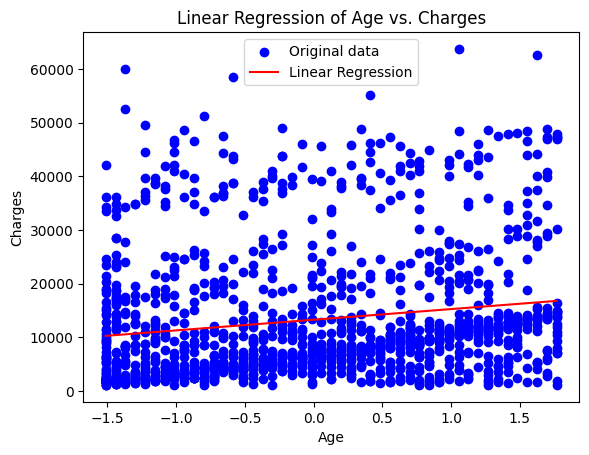

In [4]:
import matplotlib.pyplot as plt

# Choose two features to visualize: age and charges
X_plot = df[['age']]
y_plot = df['charges']

# Create a linear regression model using the chosen features
model_plot = LinearRegression()
model_plot.fit(X_plot, y_plot)

# Create a scatter plot of the chosen features
plt.scatter(X_plot, y_plot, color='blue', label='Original data')

# Create a range of values for the x-axis
x_range = np.linspace(X_plot.min(), X_plot.max(), 100)

# Predict the y values for the x_range using the linear regression model
y_range = model_plot.predict(x_range.reshape(-1, 1))

# Plot the linear regression line
plt.plot(x_range, y_range, color='red', label='Linear Regression')

# Add title and labels to the plot
plt.title('Linear Regression of Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

# Show the legend
plt.legend()

# Show the plot
plt.show()


Text(0.5, 1.0, 'Charge Vs BMI')

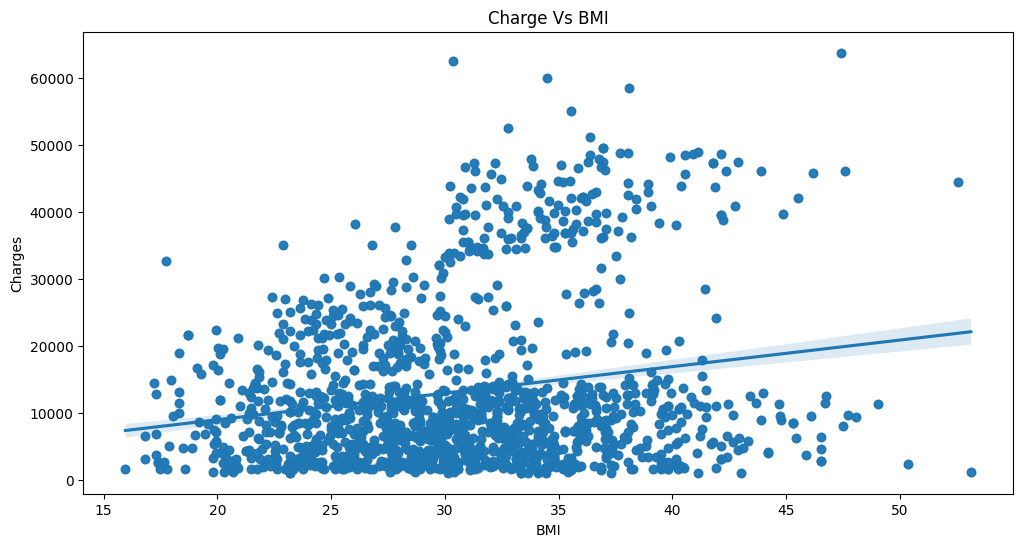

In [11]:
df = pd.read_csv("data/medical_insurance.csv", sep=",")

plt.figure(figsize=(12,6))
sns.regplot(x='bmi',y='charges',data=df)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Charge Vs BMI')

<Figure size 1200x600 with 0 Axes>

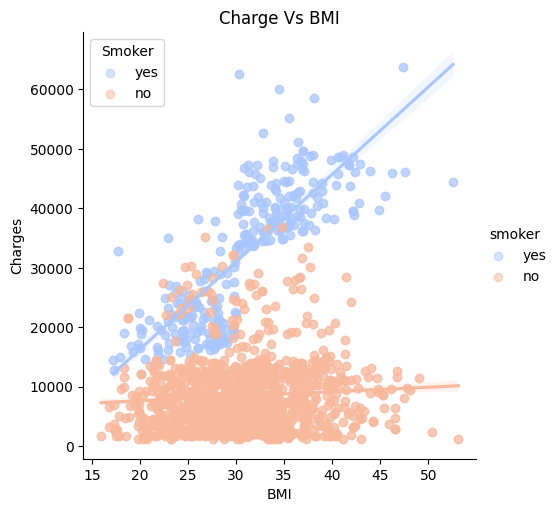

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/medical_insurance.csv", sep=",")

plt.figure(figsize=(12, 6))
sns.lmplot(x='bmi', y='charges', data=df, hue='smoker', palette='coolwarm', fit_reg=True, scatter_kws={'alpha': 0.5})
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Charge Vs BMI')
plt.legend(title='Smoker')

plt.show()
